In [1]:
%reset -f
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
#os.chdir("F:\\Practice\\Machine Learning and Deep Learning\\Classes\\Assignment\\Kaggle\\1st")

In [3]:
#df=pd.read_csv("videogamesales.zip")
df=pd.read_csv('../input/vgsales.csv')

In [4]:
from sklearn import preprocessing

In [5]:
from sklearn.compose import ColumnTransformer as ct

In [6]:
from sklearn.preprocessing import StandardScaler as ss

In [7]:
from sklearn.preprocessing import OneHotEncoder as ohe

In [8]:
from sklearn.cluster import KMeans

In [9]:
from mpl_toolkits import mplot3d

In [10]:
pd.options.display.max_columns = 200

In [11]:
df.shape

(16598, 11)

In [12]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [16]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [17]:
df.dtypes.value_counts()

float64    6
object     4
int64      1
dtype: int64

In [18]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [19]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [20]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

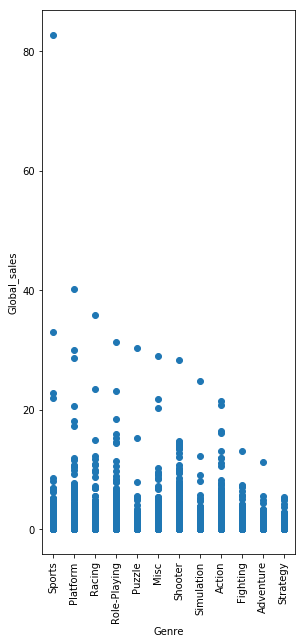

In [21]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(121)
ax1.scatter(df["Genre"], df["Global_Sales"])
ax1.set_xlabel('Genre')
ax1.set_ylabel('Global_sales')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

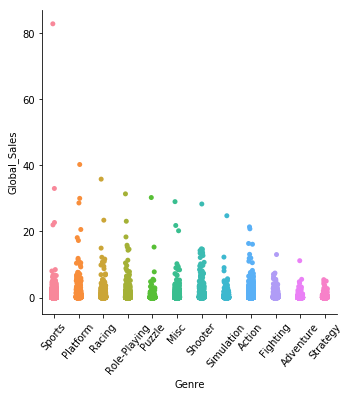

In [22]:
sns.catplot(x='Genre',y='Global_Sales', data=df)
plt.xticks(rotation=50)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

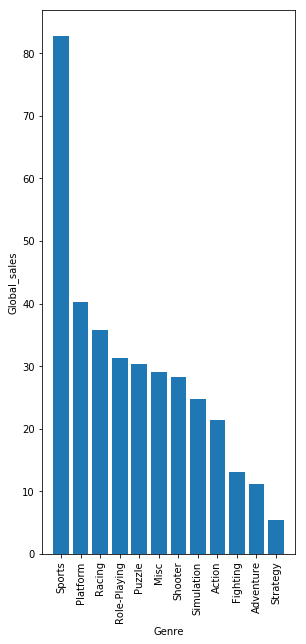

In [23]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(121)
ax1.bar(df["Genre"], df["Global_Sales"])
ax1.set_xlabel('Genre')
ax1.set_ylabel('Global_sales')
plt.xticks(rotation=90)

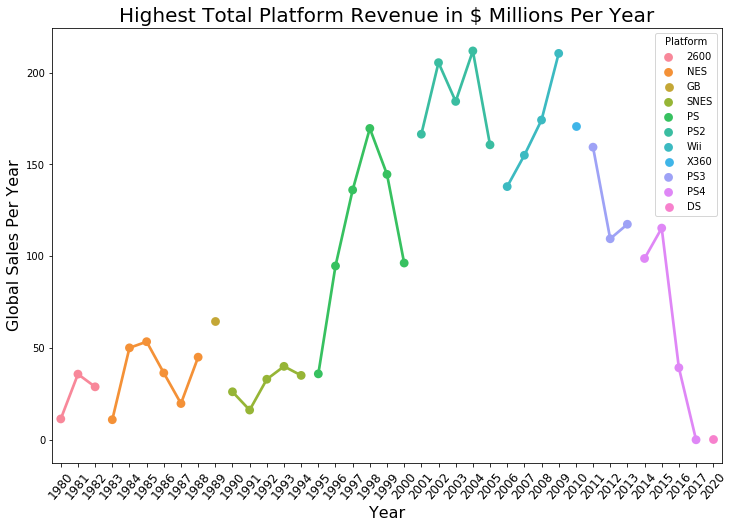

In [24]:
table = df.pivot_table('Global_Sales', index='Platform', columns='Year', aggfunc='sum')
platforms = table.idxmax()
sales = table.max()
years = table.columns.astype(int)
data = pd.concat([platforms, sales], axis=1)
data.columns = ['Platform', 'Global Sales']

plt.figure(figsize=(12,8))
ax = sns.pointplot(y = 'Global Sales', x = years, hue='Platform', data=data, size=15)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Global Sales Per Year', fontsize=16)
ax.set_title(label='Highest Total Platform Revenue in $ Millions Per Year', fontsize=20)
ax.set_xticklabels(labels = years, fontsize=12, rotation=50)
plt.show();

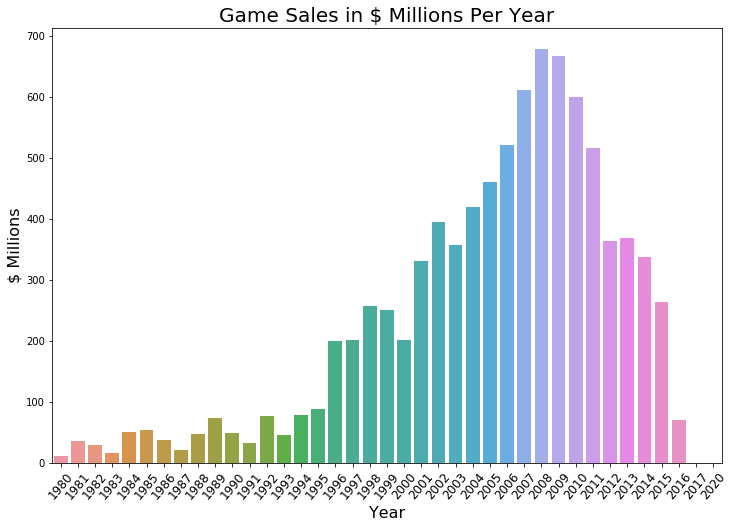

In [25]:

y = df.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='$ Millions', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year', fontsize=20)
plt.show();

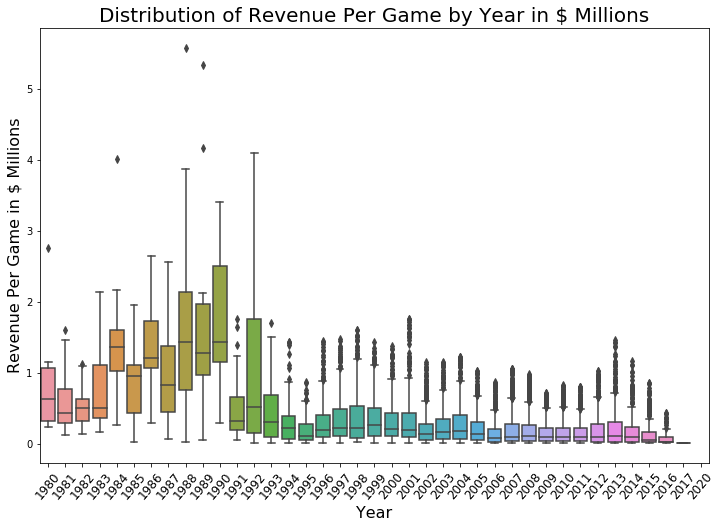

In [26]:
table = df.pivot_table('Global_Sales', columns='Year', index='Name')
q = table.quantile(0.90)
data = table[table < q]
years = table.columns.astype(int)

plt.figure(figsize=(12,8))
ax = sns.boxplot(data=data)
ax.set_xticklabels(labels=years, fontsize=12, rotation=50)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Revenue Per Game in $ Millions', fontsize=16)
ax.set_title(label='Distribution of Revenue Per Game by Year in $ Millions', fontsize=20)
plt.show()

F:\Users\Manikandan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


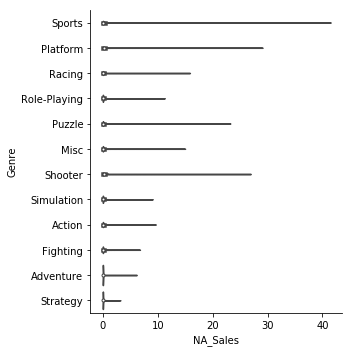

In [28]:
sns.catplot(x="NA_Sales", y="Genre", kind="violin", bw=.05, cut=0, data=df);

Text(0.5, 1.0, 'Max Global_Sales of games')

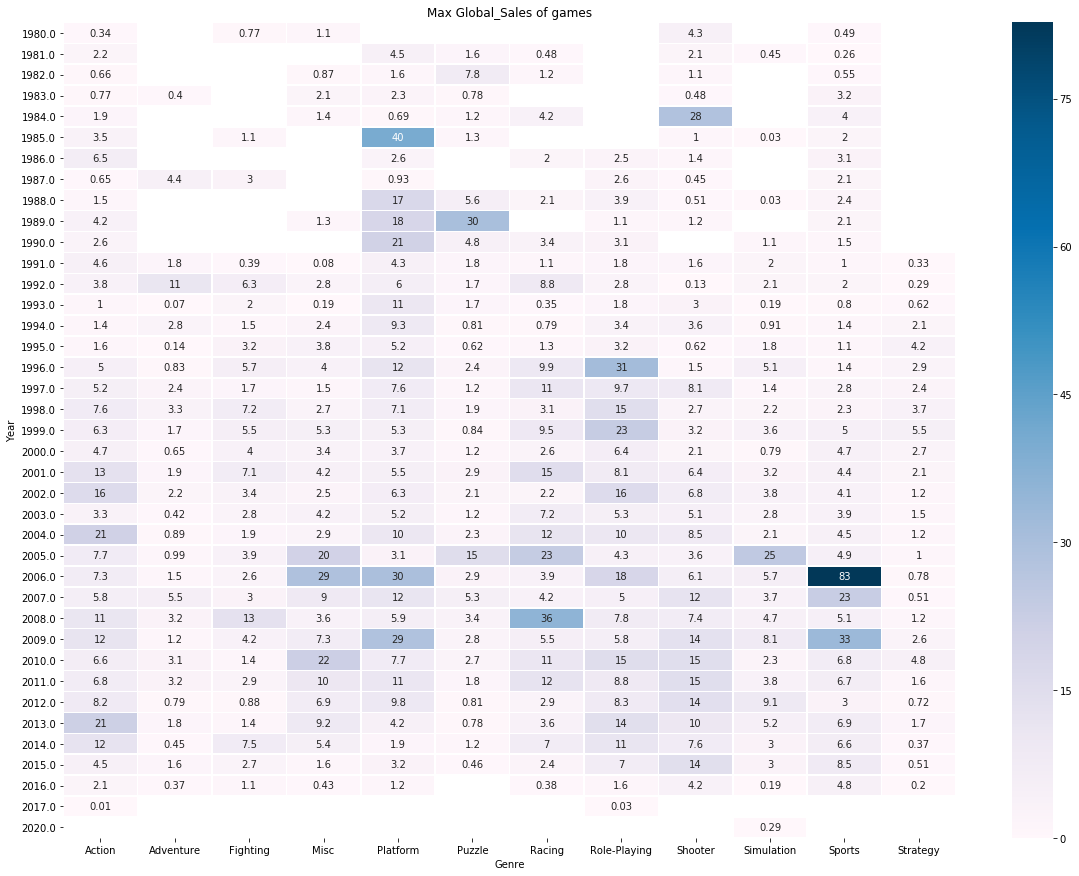

In [29]:
table_sales = pd.pivot_table(df,values=['Global_Sales'],index=['Year'],columns=['Genre'],aggfunc='max',margins=False)

plt.figure(figsize=(20,15))
sns.heatmap(table_sales['Global_Sales'],linewidths=.5,annot=True,vmin=0.01,cmap='PuBu')
plt.title('Max Global_Sales of games')